# MEDICAL INSURANCE COST PREDICTION

Many factors that affect how much you pay for health insurance are not within your control. However, it's always good to have an understanding of which are these factors and whether we can have some influence on them. 

The dataset contains some factors that can affect how much health insurance premiums cost in the United States. These are:

- Age: The age of the primary beneficiary
- Sex: Insurance contractor gender (female, male)
- bmi: Body Mass Index (BMI) is a person's weight in kilograms (or pounds) divided by the square of height in meters (or feet). A high BMI can indicate high body fatness. 
- Children: Number of children covered by health insurance / Number of dependents
- Smoker: Whether the contractor smokes or not
- Region: the beneficiary's residential area in the US, which can be northeast, southeast, southwest or northwest



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df.describe() #Here appear only the numerical variables, not the categorical

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [24]:
df.shape   # 7 columns and 1338 rows

(1338, 7)

In [25]:
df.isnull().sum()  #We don't have any null value in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

# We see that there are two categorical binary variables: sex and smoker. Region is also categorical (it can only take 4 values).

,Total Unique Values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


### EXPLORATORY DATA ANALYSIS

In [27]:
numeric_var = ["age", "bmi", "children", "charges"]
categoric_var = ["sex", "smoker", "region"]

In [28]:
numeric_axis_name = ["Age", "BMI", "Children of the contractor", "Medical insurance charges"]
categoric_axis_name = ["Sex", "Smoking condition", "Region of the contractor"]

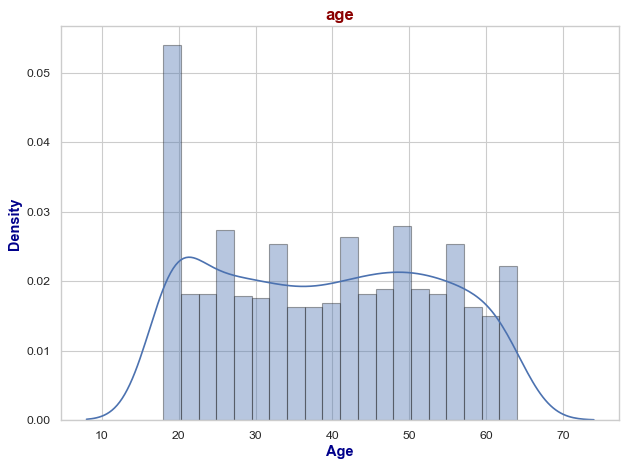

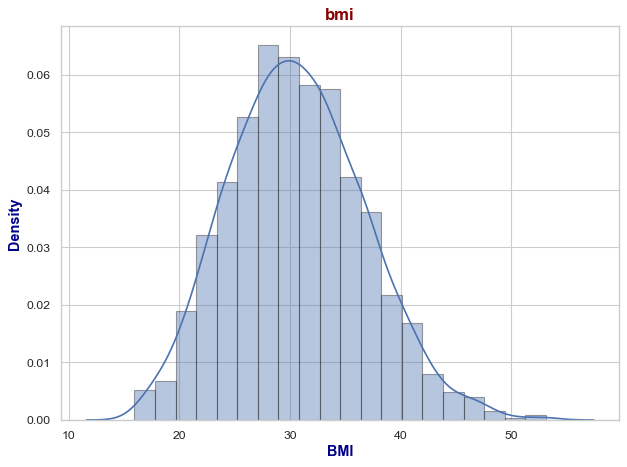

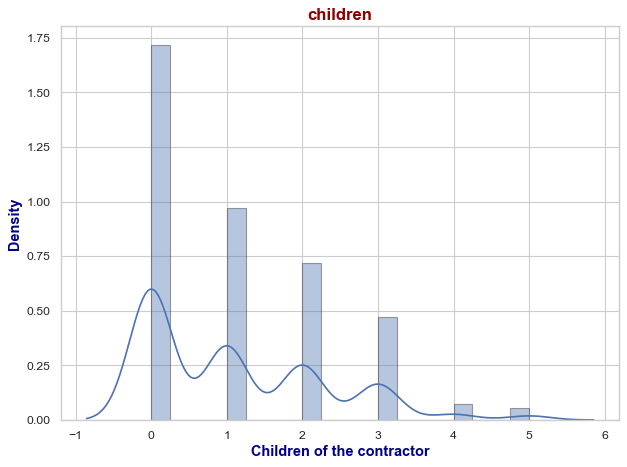

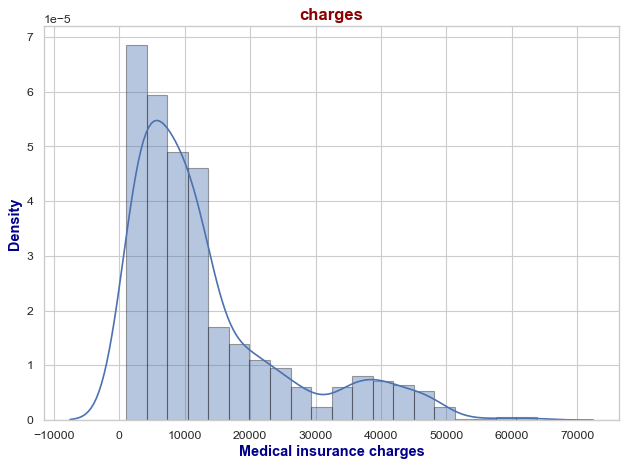

In [29]:

title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

If we take a closer look to the charges distribution, we see that the data is right-skewed. Since we want to apply a regression algorithm, that might be a problem. 

Text(0.5, 1.0, 'Distribution of Charges')

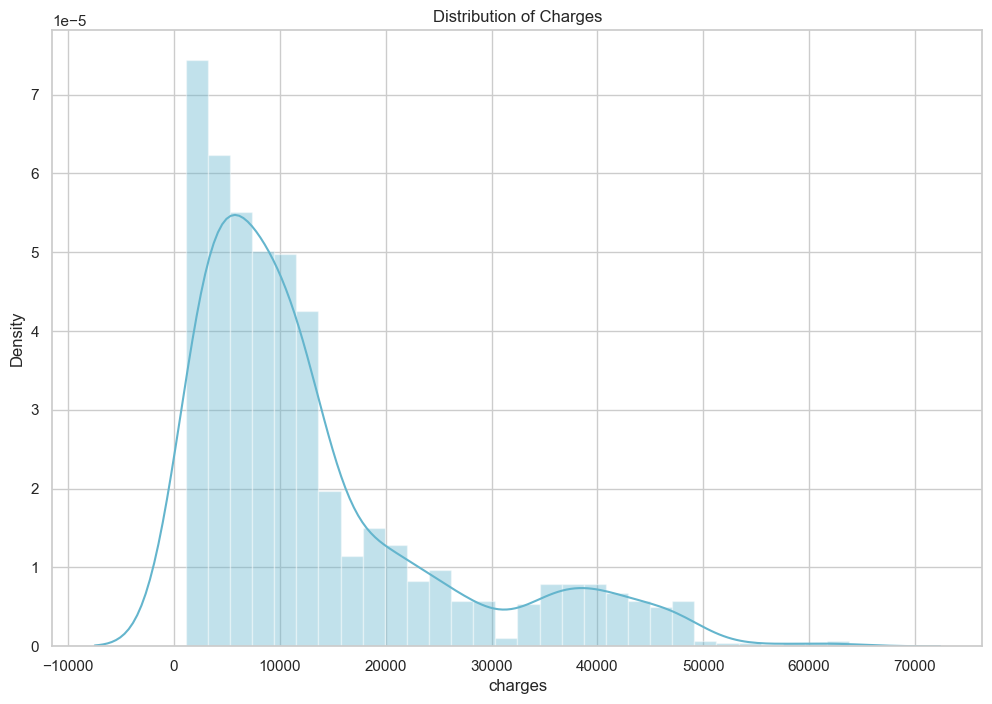

In [30]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

To make it closer to normal we can apply natural log. Taking the logarithm of the data can compress the scale of the values, particularly for data that is right-skewed or positively skewed. This means that the larger values will be reduced more than the smaller values. As a result, the distribution becomes more symmetrical, with the tail on the right side of the distribution being pulled inwards. Logarithmic transformation is particularly effective for reducing the impact of extreme values and spreading out the data in the lower range.

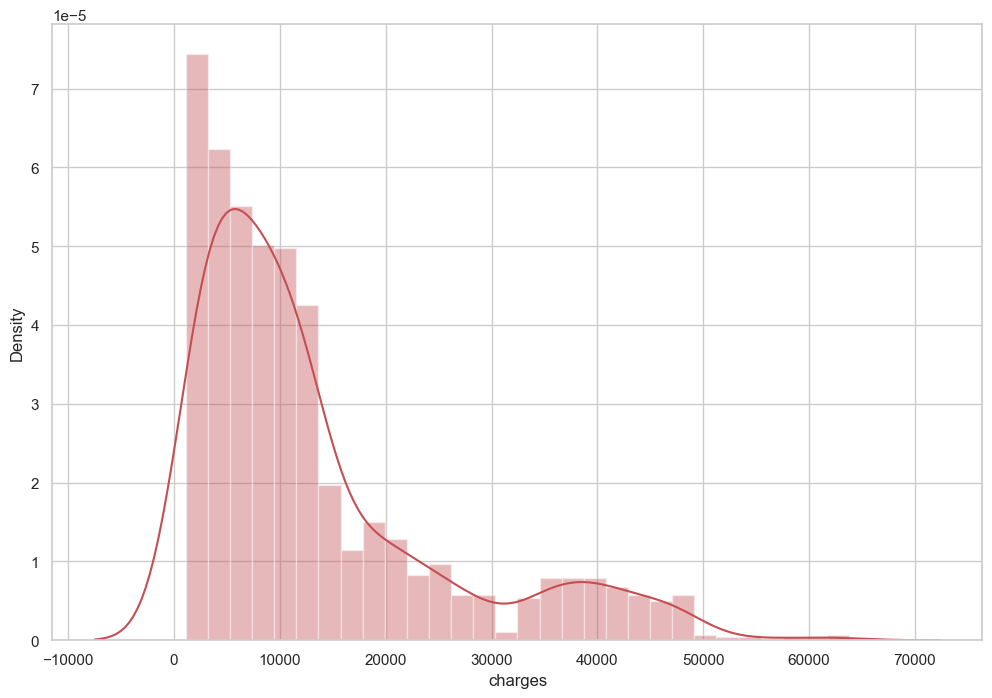

In [31]:
# df["charges"] = np.log10(df["charges"])

f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'r' )

Now, let's see the charges per region

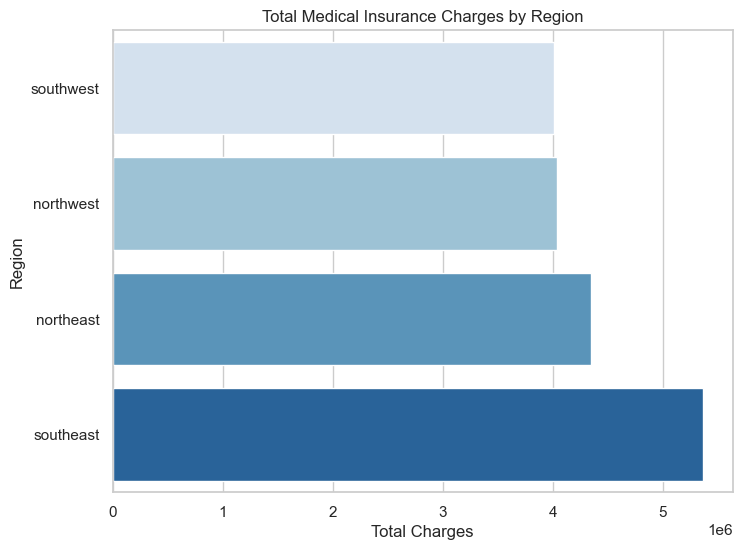

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and sum charges by region, then sort
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending=True)

# Create a bar plot
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=charges.values, y=charges.index, palette='Blues', ax=ax)

# Set labels and title, if desired
ax.set_xlabel('Total Charges')
ax.set_ylabel('Region')
ax.set_title('Total Medical Insurance Charges by Region')

# Show the plot
plt.show()


#We see that people from the southeast are being charged more 

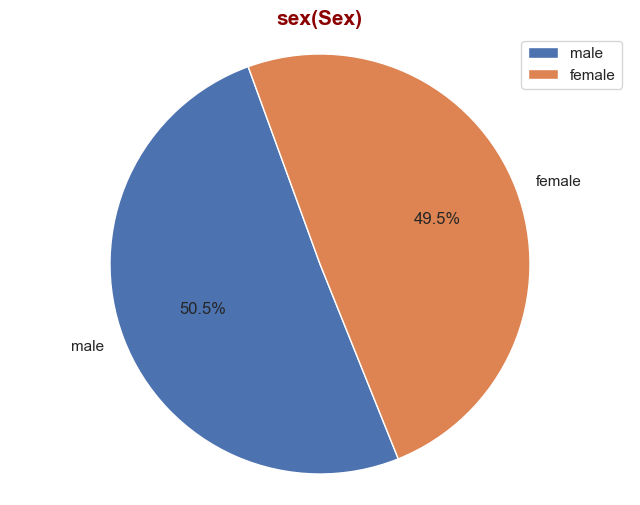

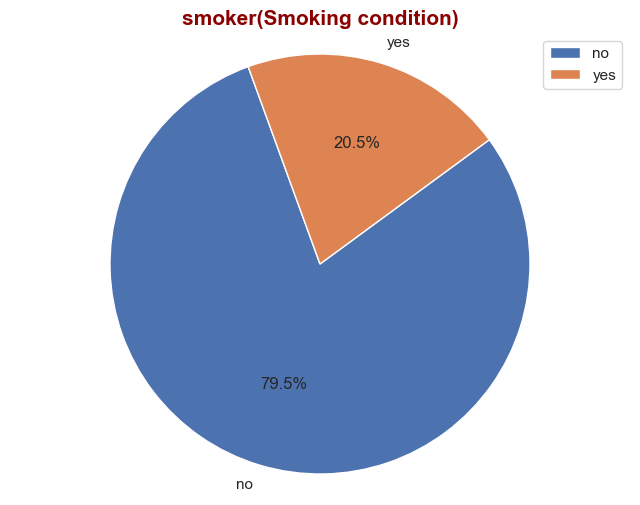

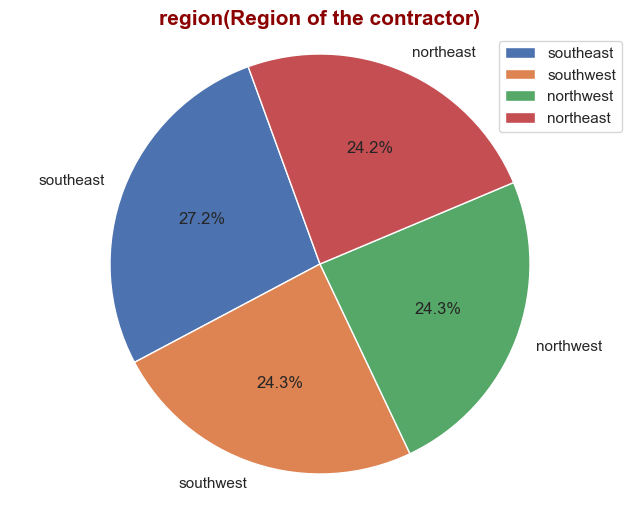

In [33]:
#Analysis with Pie Chart

title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)  #i referrs to the first variable of the zip: "categoric_var"
    total_observation_values = list(df[i].value_counts())
    

    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

Let's see how the other categorical values influence the charges variable

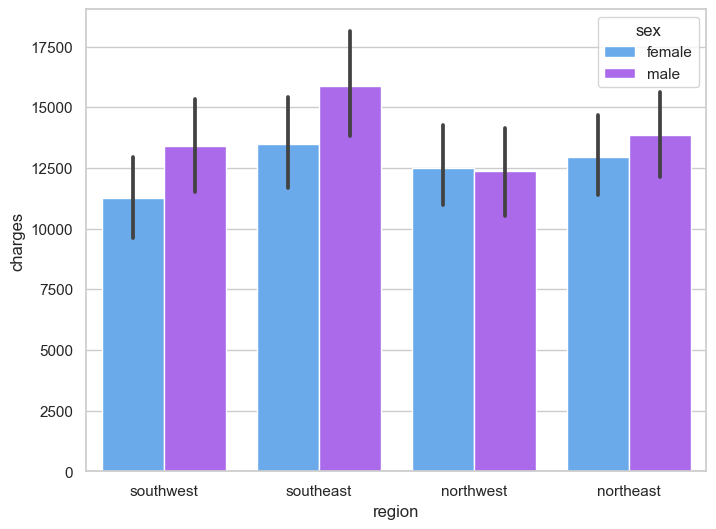

In [34]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

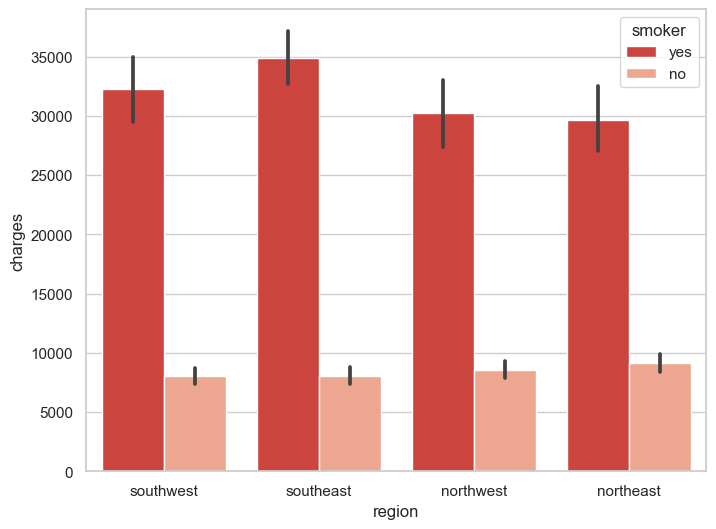

In [35]:
f, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

From the plots we can see that the sex doesn't really affect the charges of the medical insurance. However, smoking does increase this charges in every region. Now, let's explore further the charge tendency for the numerical variables age, bmi and children given the smoking condition.

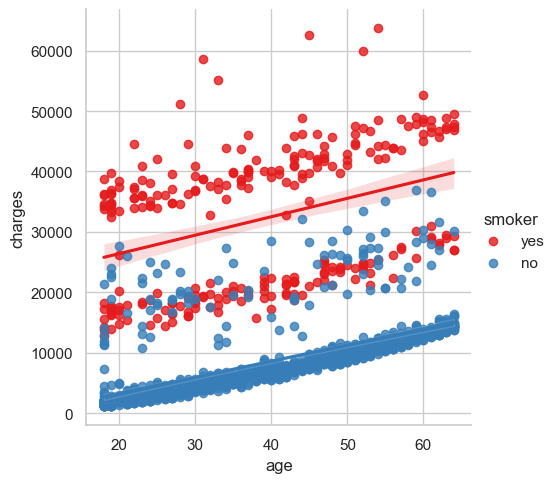

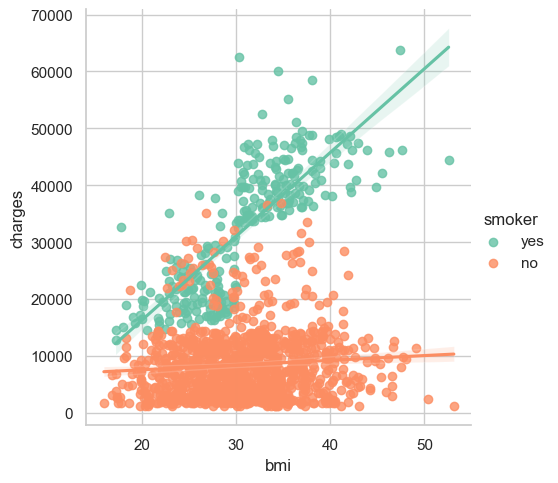

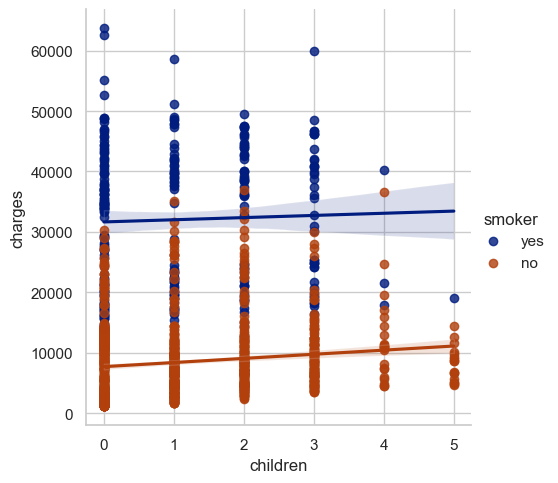

In [36]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='dark')

A higher age and bmi, as well as a bigger number of children, increase the charges (especially if the person also smokes).

### DATA PROCESSING

In [37]:
##Converting objects labels into categorical

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Creating separate label encoders for each categorical variable
sex_encoder = LabelEncoder()
smoker_encoder = LabelEncoder()
region_encoder = LabelEncoder()

# Fitting the encoders on the unique values
sex_encoder.fit(df.sex.drop_duplicates())
smoker_encoder.fit(df.smoker.drop_duplicates())
region_encoder.fit(df.region.drop_duplicates())

# Transforming the entire column
df.sex = sex_encoder.transform(df.sex)
df.smoker = smoker_encoder.transform(df.smoker)
df.region = region_encoder.transform(df.region)

# Saving the encoders to disk
joblib.dump(sex_encoder, 'sex_encoder.joblib')
joblib.dump(smoker_encoder, 'smoker_encoder.joblib')
joblib.dump(region_encoder, 'region_encoder.joblib')



['region_encoder.joblib']

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

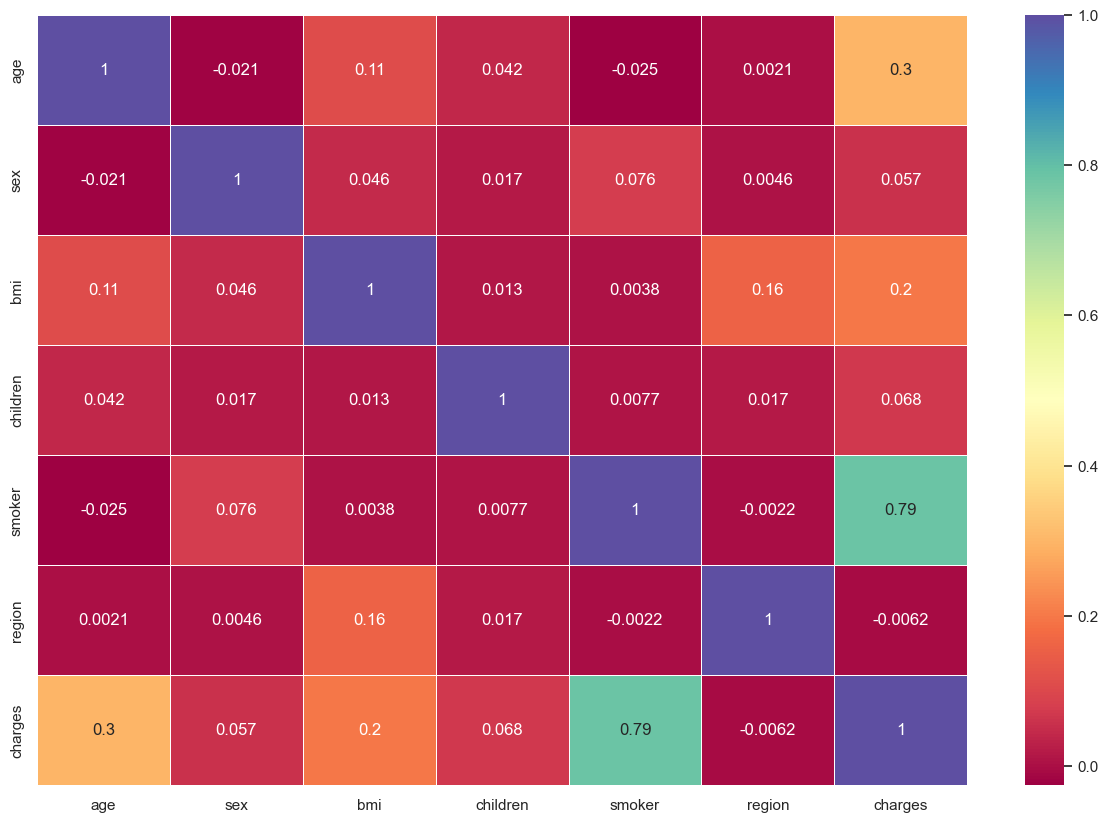

In [41]:
# Let's look at the correlation

plt.figure(figsize = (15, 10))
sns.heatmap(data = df.corr(), cmap = "Spectral", annot = True, linewidths = 0.5) #annot = True prints the corr coeff

The age and the smoking condition are the variables that have bigger correlation with the charges. 

### MACHINE LEARNING MODELLING

Let's try out different types of regression to predict the charges variable (our target variable)

### 1. Linear regression

In [42]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [43]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.score(x_test, y_test))

0.799874714544996


### 2. Random forest regression

In [44]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import metrics


x = df.drop(['charges'], axis=1)
y = df.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize RandomForestRegressor with 'squared_error' criterion
Rfr = rfr(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1)

# Fit the model
Rfr.fit(x_train, y_train)

# Make predictions
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

# Print Mean Squared Error and R2 Score
print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(y_train, x_train_pred),
       metrics.mean_squared_error(y_test, x_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train, x_train_pred),
       metrics.r2_score(y_test, x_test_pred)))


MSE train data: 3628893.887, MSE test data: 19730453.910
R2 train data: 0.975, R2 test data: 0.876


Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

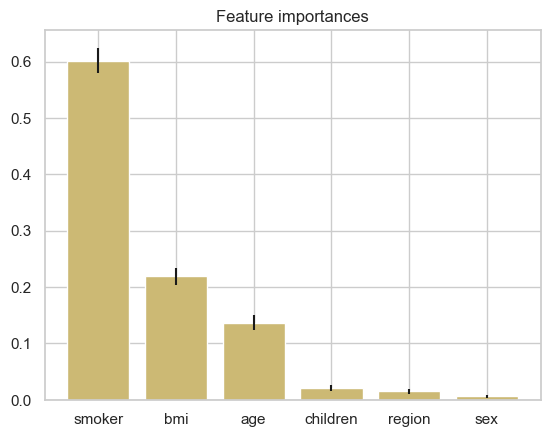

In [45]:
# Here are the feature importances from the random forest regressor:

print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

Let's try to do some hyperparameter tunning to improve the performance of this algorithm. 

In [46]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search model
grid_search = GridSearchCV(estimator=Rfr, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [47]:
# Use the best estimator
best_grid = grid_search.best_estimator_

# Make predictions using the best model
grid_train_pred = best_grid.predict(x_train)
grid_test_pred = best_grid.predict(x_test)

# Calculate and print performance metrics
print('Grid Search Tuning')
print('MSE train data: {:.3f}, MSE test data: {:.3f}'.format(
    metrics.mean_squared_error(y_train, grid_train_pred),
    metrics.mean_squared_error(y_test, grid_test_pred)))
print('R2 train data: {:.3f}, R2 test data: {:.3f}'.format(
    metrics.r2_score(y_train, grid_train_pred),
    metrics.r2_score(y_test, grid_test_pred)))


Grid Search Tuning
MSE train data: 9864408.496, MSE test data: 17501921.617
R2 train data: 0.931, R2 test data: 0.890


In [48]:
best_grid

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=1)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [50]:
def calculate_and_append_metrics_plot(model, model_name, features_test, labels_test, performance_data):
    # Predict using the model for the test set
    Model_Pred_test = model.predict(features_test)

    # Calculate metrics for the test set
    MSE_test = mean_squared_error(labels_test, Model_Pred_test)
    RMSE_test = (MSE_test ** 0.5)
    MAE_test = mean_absolute_error(labels_test, Model_Pred_test)
    r2_test = r2_score(labels_test, Model_Pred_test)

    # Create a dictionary with metrics for the test set
    metrics_dict_test = {
        "Regressors": model_name,
        "MSE": MSE_test,
        "RMSE": RMSE_test,
        "MAE": MAE_test,
        "R2 Score": r2_test
    }

    # Append the metrics dictionary to the list
    performance_data.append(metrics_dict_test)

    # Plot scatter plot for the test set
    fig, ax1 = plt.subplots()
    ax1.scatter(y=Model_Pred_test[200:250], x=[i for i in range(50)], c='r', label='Predicted Value (Test)')
    ax1.scatter(y=labels_test[200:250], x=[i for i in range(50)], c='g', label='Actual Value (Test)')
    ax1.legend(fontsize=12)
    ax1.set_ylabel('Charge', fontsize=12)
    ax1.set_title(f'{model_name}', fontsize=16)
    plt.show()

    # Print metrics for the test set
    print(f"{model_name} (Test) Metrics:")
    print(f"MSE      : {MSE_test}")
    print(f"RMSE     : {RMSE_test}")
    print(f"MAE      : {MAE_test}")
    print(f"R2 Score : {r2_test}")

    return performance_data

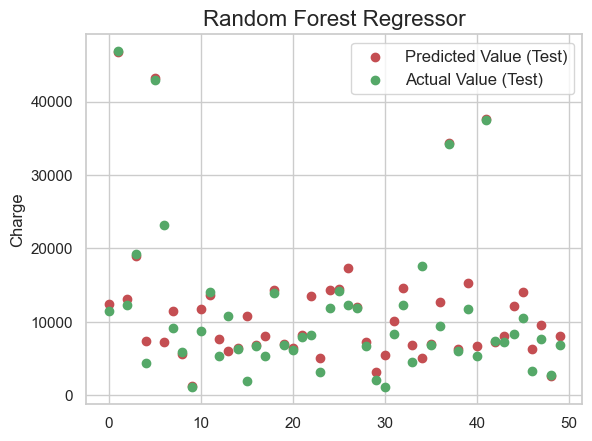

Random Forest Regressor (Test) Metrics:
MSE      : 19730453.91007201
RMSE     : 4441.897557359018
MAE      : 2643.7473409849003
R2 Score : 0.8760104406351094


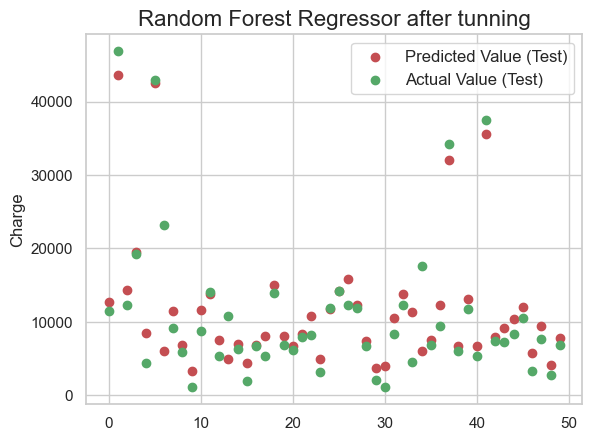

Random Forest Regressor after tunning (Test) Metrics:
MSE      : 17501921.61657717
RMSE     : 4183.529803476626
MAE      : 2720.1751550468775
R2 Score : 0.8900149201245448


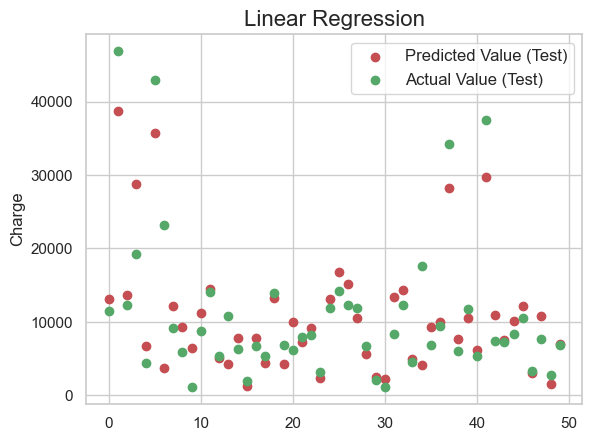

Linear Regression (Test) Metrics:
MSE      : 31845929.134159423
RMSE     : 5643.2197488809015
MAE      : 3930.3332739011385
R2 Score : 0.799874714544996


In [51]:
performance_data = []

performance_data = calculate_and_append_metrics_plot(Rfr, "Random Forest Regressor", x_test, y_test, performance_data)
performance_data = calculate_and_append_metrics_plot(best_grid, "Random Forest Regressor after tunning", x_test, y_test, performance_data)
performance_data = calculate_and_append_metrics_plot(Lin_reg, "Linear Regression", x_test, y_test, performance_data)

In [52]:
# LET'S PERFORM THE CROSS-VALIDATION

from sklearn.model_selection import cross_val_score

In [53]:
scores = cross_val_score(Rfr, x_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8380171765907711


In [54]:
scores = cross_val_score(best_grid, x_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8264420080283811


### 3. Polynomial regression

In [55]:
from sklearn.preprocessing import PolynomialFeatures
x_pol = df.drop(['charges'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol_ = pol.fit_transform(x_pol)
x_train, x_test, y_train, y_test = train_test_split(x_pol_, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

print(Pol_reg.score(x_test, y_test))

0.8705202613290357


In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3015.054654958955
Mean Squared Error: 20604105.936189223
Root Mean Squared Error: 4539.174587542236


In [57]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df


,Actual,Predicted
578,9724.53000,13165.96875
610,8547.69130,11034.59375
569,45702.02235,49393.65625
1034,12950.07120,13301.78125
198,9644.25250,9050.59375
...,...,...
1084,15019.76005,17021.75000
726,6664.68595,9427.75000
1132,20709.02034,12555.25000
725,40932.42950,45227.18750


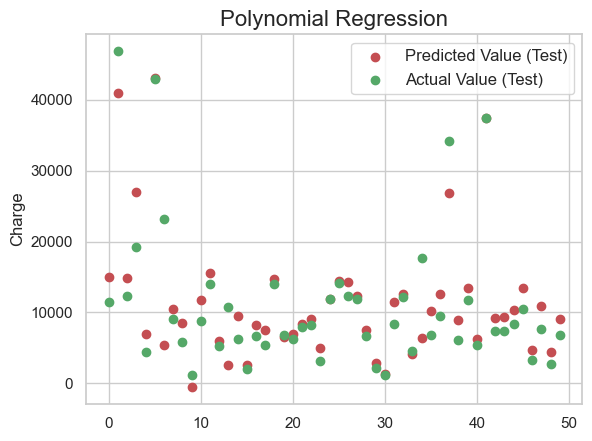

Polynomial Regression (Test) Metrics:
MSE      : 20604105.936189223
RMSE     : 4539.174587542236
MAE      : 3015.054654958955
R2 Score : 0.8705202613290357


In [58]:
performance_data_pol = []


performance_data = calculate_and_append_metrics_plot(Pol_reg, "Polynomial Regression", x_test, y_test, performance_data_pol)


In [59]:
scores = cross_val_score(Pol_reg, x_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.836537419083843


### CONCLUSION

The algorithms that perform better are the random forest regressor and the polynomial regressor. The hyperparameter tunning for the random regressor improves the R2 score, RMSE and MSE but has a worse MAE error. Having a higher MAE is worse since this means that in average, its predictions are a bit further from the true values than the original model. Therefore, we will stay with the original random forest regression. 


In [60]:
# Let's save our chosen model

from joblib import dump

dump(Rfr, 'random_forest_regressor.joblib')


['random_forest_regressor.joblib']

In [63]:
from joblib import dump

dump(best_grid, 'best_random_forest_regressor.joblib')


['best_random_forest_regressor.joblib']